<p align="center">
  <span style="color:Navy; font-size:200%; font-weight:bold; vertical-align:middle;">
    Temas Selectos: Python para Ciencias de la Tierra
  </span>
  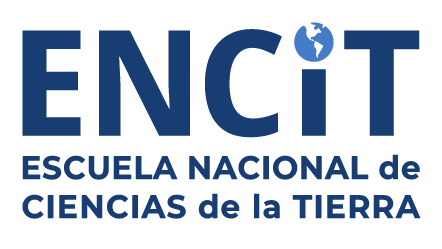
</p>
<p align="center" style="line-height:1.2;">
  <span style="color:RoyalBlue; font-size:160%;">Tema 3: MAnálisis Geoespacial de Datos</span><br/>
  <span style="color:DodgerBlue; font-size:140%;"> Técnicas de análisis raster y vectorial </span><br/>
  <span style="font-size:100%;color:forestgreen"> Escuela Nacional de Ciencias de la Tierra  |  Semestre 2026-I</span>
</p>

---


# **<font color="ForestGreen"> Coordinate Reference sustem (CRS) </font>**

## **<font color="SeaGreen"> Coordenadas geográficas </font>**

> Definimos una posición en el planeata en grados de latitud y longitud, relativos al ecuador y al primer meridiano. Con este sistema podemos especificar cualquier ubicación en el planeta.



<div class="alert alert-block alert-info">
<b>Nota:</b> Cuidado, en python se usa el orden (longitud, latitud). Además la longitud está en un grando de -180 a 180 grados, y la latitud en un rango de 90 a -90 grados.
</div>

## **<font color="SeaGreen"> Coordenadas proyectadas </font>**
> Usualmente proyectamos el planeata en 2D para poder expresar ubicaciones en cooredenadas cartesianas x y y. 

Para minimizar el error de la proyección, existen distintas proyecciones: 
- Proyección de área iguales de Albert
- La proyección Mercator


Una representación es la `proj4` string, en python es representada como un diccionario. 
Por ejemplo: 

`+proj = lonlat +datum=WGS84 +nodefs`

`{'proj': 'latlon','datum':'WGS84','no_defs':True}`


La mayoría de los datos están representados en el sistema EPSG
`+EPSG:4326` = WGS84 CRS geográfico (longitud,latitud)

En GeoPandas, la información del CRS se guarda en el atributo `crs`, lo que regresa es la proyección en un string o diccionario.

`geo_df = geopandas.read_file("archivo.shp")`

`+print(geo_df.crs)`
imprime

`{'init':'epsg:4326'}`



In [ ]:
!pip install contextily
!pip install mapclassify
!pip install folium
!pip install fiona

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec
import contextily
import geopandas

from shapely.geometry import Point
import mapclassify

In [ ]:
# Importen el archivo paris_districts_utm.geojson
districts = ____________

# Impriman la información del CRS
print(____)

# Impriman las primeras filas del GeoDataFrame
print(____)

## **<font color="SeaGreen"> Datos ráster vs datos vectoriales </font>**

Si no hay información sobre el tipo de CRS, se puede poner manualmante con el método `to_crs`.
Por ejemplo: 

`geo_df2 = geo_df.to_crs({'proj':'lonlat','datum':'WGS84','no_defs':True})` 

o 

`geo_df2 = geo_df.to_crs(epsg=4326)`

Recuerden que pueden usar el CRS de otro GeoDataFrame para llevar sus datos al mismo CRS

`geo_df2 = geo_df2.to_crs(geo_df1.crs)`


Recuerden que la elección del CRS depende del objetivo de su análisis. 


Sitios de interés:
https://spatialreference.org/
https://epsg.io/


In [ ]:
# Creen el GeoDataFrame districts_lonlat usando el EPSG 4326

districts_lonlat = _________________

#impriman el CRS
________________________

Vamos a ver la diferencia entre tres proyecciones:

1. Impriman el CRS de districts, y districts_lonlat
2. Muestren un mapa de districts
3. Conviertan districts a otra proyección CRS (EPSG:2154), este nuevo dataset se llamará districts_RGF93.
4. Creen un mapa para districts_RGF93.
5. Creen un mapa para districts_lonlat.

¿Ven alguna diferencia?


In [ ]:
# Impriman el CRS de districts
print(districts.crs)

# Muestren el mapa
____
plt.show()

# Conviertan districts al CRS RGF93
districts_RGF93 = districts.____

# Muestren el mapa de districts_RGF93
districts_RGF93.____
plt.show()

# Muestren el mapa de districts_lonlat
_________
_______

## **<font color="SeaGreen"> Proyectando un punto. </font>**

En el notebook anterior, trabajamos con la ubicación de la Torre Eiffel. Nuevamente, proporcionamos las coordenadas en un sistema de coordenadas proyectadas para que, por ejemplo, se puedan calcular distancias. Volvamos a este emblemático monumento y expresemos su ubicación en coordenadas geográficas: 48°51′29.6″N, 2°17′40.2″E. O, en decimales: latitud 48.8584 y longitud 2.2945.

Los objetos geométricos Shapely no tienen noción de CRS y, por lo tanto, no se pueden convertir directamente a otro CRS. Por lo tanto, usaremos GeoPandas para transformar la ubicación del punto de la Torre Eiffel en un CRS alternativo. Introduciremos el punto en una GeoSeries, usaremos el método `to_crs()` y extraeremos el punto de nuevo.


* Creen un objeto POINT en shapely con las coordenadas de la Torre Eiffel y asígnelo a una variable llamada eiffel_tower.
* Creen una GeoSeries (llamada s_eiffel_tower) con la Torre Eiffel como único elemento y especifique el CRS EPSG:4326.
* Conviertan s_eiffel_tower a EPSG:2154 y llamen al resultado s_eiffel_tower_projected.


In [ ]:
# Construyan un punto para la Torre Eiffel
eiffel_tower = ____

# Conviertan el punto en una GeoSeries con el CRS correcto
s_eiffel_tower = geopandas.GeoSeries([____], crs='____')

# Conviertan el punto a un CRS EPSG 2154
s_eiffel_tower_projected = s_eiffel_tower.____

# Impriman el punto
print(s_eiffel_tower_projected)

## **<font color="SeaGreen"> Cálculo de la distancia en un sistema de coordenadas proyectado </font>**



Ahora que tenemos la ubicación de la Torre Eiffel en un sistema de coordenadas proyectado, podemos calcular la distancia a otros puntos.

Usaremos el último objeto `s_eiffel_tower_projected` del ejercicio anterior, que contiene el punto proyectado, y extraemos el punto único en la variable `eiffel_tower`. Además, también usaremos el dataframe de restaurantes (utilizando coordenadas WGS84).

1. Sube el archivo "paris_restaurants.csv" y conviértelo a un GeoDataFrame.
2. Convierte el GeoDataFrame al mismo CRS que el punto de la Torre Eiffel. Para este ejercicio, no especifiques la palabra clave epsg, sino el atributo .crs.
3. Calcula la distancia de todos los restaurantes a la Torre Eiffel.
4. Imprime la distancia más pequeña.

In [ ]:
# Leemos el archivo csv
df =___________________________

# Convertir df a un GeoDataFrame
restaurants = geopandas.GeoDataFrame( df, geometry=geopandas.points_from_xy(df['x'], df['y']), crs="EPSG:4326"   # WGS84 (lat/lon)
                                        )
# muestren las primeras 5 filas. 

#Conviertan el CRS del punto s_eiffel_tower al mismo que restaurants 
s_eiffel_tower_projected = __________________.to_crs(__________.crs)
eiffel_tower = _______________________.iloc[0]

#Calculen la distancia de cada restaurante al torre Eiffel
dist_eiffel = _________________.distance(__________)
#Impriman las distancias
_______________________________

# Impriman la distancia mínima
________________________________

### **<font color="SeaGreen"> Operaciones espaciales: creación de nuevas geometrías </font>**

De manera similar a la clase pasada, podemos hacer ciertas operaciones con poligonos, por ejemplo:


**1. Obtener intersecciones de poligonos:**

![intersec](intersection.png)


**2. Obtener uniones y**

![union](union.png)


**3. Obtener diferencias.**

![dif](dif.png)

### **<font color="SeaGreen"> Datos de uso del suelo </font>**

Para los siguientes ejercicios, primero presentamos un nuevo conjunto de datos: un conjunto de datos sobre el uso del suelo de París. El uso del suelo indica para qué tipo de actividad se utiliza una zona determinada, como residencial o recreativa. Se trata de un conjunto de datos multipoligonal, con una etiqueta que representa la clase de uso del suelo para las diferentes zonas de París.

En este ejercicio, leeremos los datos, los exploraremos visualmente y calcularemos la superficie total de las diferentes clases de uso del suelo en la zona de París.

Esta base de datos viene de: https://land.copernicus.eu/en/products/urban-atlas

* Lea el archivo 'FR001L1_PARIS_UA2012_revised_v021.gpkg' y asigne el resultado a la variable land_use.
* Genere un gráfico de land_use, usando la columna 'class_2012' para colorear los polígonos. También agregamos una leyenda. 
>Nota: El gráfico puede tardar unos segundos en generarse debido a la gran cantidad de polígonos.

* Agregue una nueva columna 'area' con el área de cada polígono.
* Calcule el área total en km² para cada 'class_2012' usando el método groupby() e imprima el resultado.

In [ ]:
import zipfile
import os

zip_path = '22178.zip'  # Cambia esto por la ruta real
extract_to = '/home/'  # Carpeta donde se extraerán los archivos

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

In [ ]:
directorio_interno = '/home/.../Results/'

if zip_interno:
    with zipfile.ZipFile(zip_interno, 'r') as zip_ref:
        zip_ref.extractall(directorio_interno)
else:
    print('No se encontró un archivo ZIP interno.')

In [ ]:
import fiona
# Antes de abrir su archivo, tiene que saber que, aveces las bases de datos vienen en capas, 
# para ver las capa que contiene nuestra bes podemos usar la siguiente libreria y funcion

layers = fiona.listlayers('/home/jovyan/Unidad_3/Results/FR001L1_PARIS_UA2012_revised_v021/Data/FR001L1_PARIS_UA2012_revised_v021.gpkg')
print(layers)


In [ ]:
#import geopandas as gpd

# Para leer la capa principal
land_use = geopandas.read_file('FR001L1_PARIS_UA2012_revised_v021.gpkg', layer='FR001L1_PARIS_UA2012_revised')

# Para leer la capa de límites
boundary = geopandas.read_file('FR001L1_PARIS_UA2012_revised_v021.gpkg', layer='FR001L1_PARIS_UA2012_revised_Boundary')

# Para leer la capa del núcleo urbano
urban_core = geopandas.read_file('FR001L1_PARIS_UA2012_revised_v021.gpkg', layer='FR001L1_PARIS_UA2012_revised_UrbanCore')

In [ ]:
#import geopandas as gpd

# Para leer la capa principal
land_use = geopandas.read_file('/home/jovyan/Unidad_3/Results/FR001L1_PARIS_UA2012_revised_v021/Data/FR001L1_PARIS_UA2012_revised_v021.gpkg', layer='FR001L1_PARIS_UA2012_revised')

# Para leer la capa de límites
boundary = geopandas.read_file('/home/jovyan/Unidad_3/Results/FR001L1_PARIS_UA2012_revised_v021/Data/FR001L1_PARIS_UA2012_revised_v021.gpkg', layer='FR001L1_PARIS_UA2012_revised_Boundary')

# Para leer la capa del núcleo urbano
urban_core = geopandas.read_file('/home/jovyan/Unidad_3/Results/FR001L1_PARIS_UA2012_revised_v021/Data/FR001L1_PARIS_UA2012_revised_v021.gpkg', layer='FR001L1_PARIS_UA2012_revised_UrbanCore')

In [ ]:
land_use.head()

In [ ]:
#Creen un mapa para land_use de modo se coloree considerando el tipo de uso de suelo ('class_2012')
________________________________________________
plt.show()

In [ ]:
#Creen otra columna donde midan el area de cada geometria
_______________________________

In [ ]:
# Agrupen land_use considerando el tipo de uso y calculen el area de cada clase en km2.
total_area = 
total_area

### **<font color="SeaGreen"> Intersección de dos polígonos </font>**


Para este ejercicio, utilizaremos dos polígonos individuales: el distrito de Muette, que extraeremos del conjunto de datos `"districts"`, y un parque público al oeste de París, que extraeremos del conjunto de datos `"land_use"`.



In [ ]:
# Primero extrae el distrito 'Muette' de districts
muette =__________________________________________________
muette

In [ ]:
# Ahora van a extraer las areas verdes urbanas 'Green urban areas' de land_use 
green_areas = ___________________________________________________________
#green_areas

In [ ]:
# Si quisieran explorar todas las areas verdes de Paris, recuerden esta herramienta
#green_areas.explore() 

In [ ]:
# No queremos trabajar con todas las areas, asi que extraeremos un parque de green_areas
# Extraigan el dato cuyo identificador es '149138-FR001L1'
parque =___________________________________________
parque

In [ ]:
## Antes de hacer cualquier cosa, debemos asegurarnos que ambos poligonos tengan el mismo crs
print(__________)
print(__________)

In [ ]:
# Si no es el mismo, conviertan el crs de muette para que tenga el crs de parque
muette = ________________________

##### **Ya tenemos los dos sitios que queremos estudiar**

Ahora, vamos a:
* Trazar los dos polígonos en un solo mapa para examinar visualmente el grado de superposición.
* Calcular la intersección de los polígonos del parque y del distrito Muette.
* Carlular la proporción del área del distrito que ocupa el parque.

> NOTA: parque es un multipoligono y muette es un poligono, esto nos puede causar problemas para poder visualizarlo y hacer operaciones.
> Siempre deben verificar el tipo de geometrias que tienen sus objetos. 

In [ ]:
muette.geometry

In [ ]:
parque.geometry

In [ ]:
# Como parque es un multipoligono y muette un poligono, debemos llevar a parque a la misma geometria que muette.
parque_union = parque.union_all()
parque_union

In [ ]:
# Si tenemos dudas de si hemos hecho algo mal en la extraccion de informacion, podemos usar esto
print(parque.geometry.is_empty.any())
print(muette.geometry.is_empty.any())

Ahora, visualicemos los dos polígonos.


Tenemos dos formas de hacerlo.

Verán que se superponen.



In [ ]:
parque_geom = parque.geometry.iloc[0]
muette_geom = muette.geometry.iloc[0]

geopandas.GeoSeries([parque_geom, muette_geom]).plot(alpha=0.5, color='blue')
plt.show()


In [ ]:
parque_geom = parque.union_all()
muette_geom = muette.union_all()

geopandas.GeoSeries([parque_geom, muette_geom]).plot(alpha=0.5, color= 'blue')
plt.show()


In [ ]:
# Ahora, calcularemos la interseccion de estos poligonos. 
# En este caso, tenemos que usar las geometrias 

intersection = parque_geom.intersection(muette_geom)

# Ahora, grafiquen la interseccion 
geopandas.GeoSeries(________________).plot()
plt.show()

# Calculen la proporcion del area del distrito que esta ocupada por el parque
print(_____________________ / _____________________ )

Tal vez ahora no parezca de mucha utilidad calcular la interseccion, pero si el parque estuviera en dos distritos diferentes, nos daria una idea de cual distrito tiene mas area de parque. 

Otra forma de ver el area que ocupa el parque es graficando la diferencia. 

In [ ]:
# Ahora, quiten el area del parque al distrito muette.

difer = ___________.difference(___________)

# Ahora, grafiquen el resultado 
geopandas.GeoSeries(_______).plot()
plt.show()


---
### **<font color="SeaGreen"> Intersección de un GeoDataFrame con un polígono </font>**

Al combinar los conjuntos de datos de uso del suelo y de distritos, podemos investigar el uso del suelo en un distrito determinado.

Para ello, primero debemos determinar la intersección de los conjuntos de datos de uso del suelo con un distrito determinado. Tomemos como ejemplo el distrito de Muette.

1. Calcula la intersección de los polígonos land_use con el polígono muette. Llama al resultado land_use_muette.
2. Gráfica rápidamente esta intersección y pasa edgecolor='black' para ver con mayor claridad los límites de los diferentes polígonos.
3. Imprime las primeras cinco filas de land_use_muette.



In [ ]:
# Si quisieran explorar todas las areas verdes de Paris, recuerden esta herramienta
#green_areas.explore() 

In [ ]:
# Antes de hacer la interseccion, debemos asegurarnos que ambos GeoDataFrames tengan el mismo CRS
#Imprime los CRS de cada GeoDataFrame
_____________
_____________

#Si no coinciden, haz que muette tenga el mismo CRS que land_use
______________________

In [ ]:
# Para hacer la interseccion de los dos GeoDataFrames usaremos una nueva funcion de geopandas
# Esta nos permitira crear un nuevo GeoDataFrame a partir de dos, pueden usar  ‘intersection’, ‘union’, ‘identity’, ‘symmetric_difference’ or ‘difference’.
# Recuerden que sjoin tambien puede ayudar
land_use_muette =  geopandas.overlay(land_use, muette, how='intersection')

#impriman las primeras filas de land_use_muette

In [ ]:
# Gráfica esta intersección y pasa edgecolor='black' para ver con mayor claridad los límites de los diferentes polígonos.
______________________________

In [ ]:
# Gráfica esta intersección, ahora que se coloree por tipo de uso y pasa edgecolor='black' para ver con mayor claridad los límites de los diferentes polígonos.
______________________________

### **<font color="SeaGreen"> Mineria en el congo </font>** 

En este ejercicio, comenzaremos leyendo y explorando dos nuevos conjuntos de datos:

Primero, un conjunto de datos sobre yacimientos de minería artesanal en el este del Congo (adaptado de los datos abiertos de IPIS).
https://ipisresearch.be/wp-content/uploads/2018/03/Open_Data_Tutorial.html
Segundo, un conjunto de datos sobre los parques nacionales del Congo (del Instituto de Recursos Mundiales).
https://cod-data.forest-atlas.org/

Para cada uno de estos conjuntos de datos, leen los datos con geopandas.read_file(), inspeccionen las primeras 5 filas y el Sistema de Referencia de Coordenadas (SRC) de los datos, y realicen una visualización rápida.

1. Extraigan los datos de Protected_areas.zip
2. Lean y exploren los datos del sitio minero ("ipis_cod_mines.geojson"), asignándolos a una variable llamada mining_sites.
3. Lean y exploren los datos de las área protegidas ("Protected_areas.shp") y asígnelo a national_parks

In [ ]:
#zip_path = '/home/.../Protected_areas.zip'  
#extract_to = '/home/.../Unidad_3/' 
#with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#    zip_ref.extractall(extract_to)

In [ ]:
# Lean las bases de datos
mining_sites = ___________________________
national_parks = _____________________________
# Impriman las primeras filas y el CRS de cada GeoDataFrame
print(____)
print(____)

# Creen un mapa rápido.
____
plt.show()

### **<font color="SeaGreen"> Convertir a un SRC común y guardarlo en un archivo </font>** 

Como vimos en los ejercicios anteriores, ambos conjuntos de datos utilizan un Sistema de Referencia de Coordenadas (SRC) diferente. Esto también se ilustra en los primeros gráficos. Ambos conjuntos de datos se refieren a la misma región, por lo que normalmente deberían superponerse en sus coordenadas; pero no es así.

Para realizar los análisis, convertiremos ambos conjuntos de datos al mismo SRC y los guardaremos en un nuevo archivo. Para garantizar que podamos realizar cálculos basados en la distancia, los convertiremos a un SRC proyectado: la zona UTM local 35, identificada por EPSG:32735 (https://epsg.io/32735).
Entonces:
1. Convierta ambos conjuntos de datos (mining_sites y national_parks) a EPSG:32735.Asigne a los resultados el nombre mining_sites_utm y national_parks_utm.
2. Intente visualizar de nuevo ambos conjuntos de datos en un solo mapa. ¿Se superponen ahora ambos conjuntos de datos?

In [ ]:
# Convertir ambos GeoDataFrames al mismo CRS 
mining_sites_utm = ____
national_parks_utm = ____

# Mostrar el mapa de los datos con la proyección 
ax = national_parks_utm.plot()
mining_sites_utm.plot(ax=ax, color='red')
plt.show()

## **Generar un archivo**

Escriba mining_sites_utm en un archivo GeoPackage llamado "ipis_cod_mines_utm.gpkg" y escriba national_parks_utm en un Shapefile ESRI llamado "cod_conservation_utm.shp".

Para esto, usamos la función .to_file("archivo_nuevo.tipo", driver="driver")

Para archivos .gpkg, driver='GPKG'
Para archivos .shp, driver='ESRI Shapefile'

In [ ]:
# Write converted data to a file
mining_sites_utm.to_file("ipis_cod_mines_utm.gpkg", driver='GPKG')
national_parks_utm.to_file("cod_conservation_utm.shp", driver='ESRI Shapefile')

### **<font color="SeaGreen"> Diseño de un gráfico multicapa </font>**  

Ahora que hemos convertido ambos conjuntos de datos al mismo Sistema de Referencia de Coordenadas (SRC), vamos a crear un gráfico más atractivo combinando ambos.
Usando los datos convertidos, edite el código para trazar los parques nacionales como polígonos verdes y los sitios mineros como pequeños puntos (un tamaño de marcador de 5).

In [ ]:
# Mapa de los parque y sitios de minería
ax = _________________.plot(color='green')
________________________.plot(ax=ax, markersize=_______)
plt.show()

In [ ]:
# Mapa de los parque y sitios de minería ahora usando  alpha=0.5 para que los puntos de mining_site se grafiquen por tamaños
ax = _________________.plot(color='green')
________________________.plot(ax=ax, markersize=_______)
plt.show()

In [ ]:
#Mapa de los parque y sitios de minería ahora pidiendo que mining_sites se coloree por tipo de mineral 
ax = _________________.plot(color='green')
________________________.plot(ax=ax, markersize=_______, __________, _____________)
plt.show()

### **<font color="SeaGreen"> Buffers, Zona de influencia alrededor de un punto</font>**  


Considere la ciudad de Goma, capital de la provincia de Kivu del Norte del Congo, cerca de la frontera con Ruanda. Sus coordenadas son 1,66°S 29,22°E (el punto ya se proporciona en coordenadas UTM como la variable goma).

¿Cuántos yacimientos mineros se encuentran a menos de 50 km de Goma? ¿Y qué extensión tiene el parque nacional? Determinémoslo mediante la operación de zona de influencia. Recuerde que las distancias deben expresarse en la unidad del CRS (es decir, en metros en este caso).

Nota: Si tiene una serie booleana (por ejemplo, como resultado de un método de relación espacial), puede calcular cuántos valores verdaderos (es decir, cuántas geometrías pasaron la comprobación) sumando esos valores booleanos, ya que, en ese caso, los valores verdaderos y falsos se verán como unos y ceros.

* Crea una zona de influencia de 50 km alrededor de goma y asígnala a la variable goma_buffer.
* Comprueba cuáles de los puntos de mining_sites se encuentran dentro de esta zona de influencia (y llámala máscara). Cuenta esos sitios sumando la máscara booleana e imprime el resultado.
* Calcula las intersecciones de los parques nacionales con la zona de influencia. Suma el área de esas intersecciones e imprime el resultado en km².

In [ ]:
#Ciudad de Goma
goma = geopandas.GeoSeries([Point(746989.5594829298, 9816380.942287602)],crs='EPSG:32735')
# Goma es un punto para esto usar punto.buffer(tamaño del area)
print(type(goma))

# Crear un buffer de 50km al rededor de Goma
goma_buffer = ____

# El buffer es un poligono
print(type(goma_buffer))

# Cuenten cuántas zonas mineras están cerca de goma
mask = ____
print(____)

# Calculen el área de los parques naciones que están en goma 
print(national_parks.____ / (1000**2))

### **<font color="SeaGreen">Sitios mineros dentro de parques nacionales </font>**  

Para este ejercicio, comencemos con uno de los parques nacionales, el Parque Nacional Kahuzi-Biega (que se extrajo del conjunto de datos national_parks y se proporciona como la variable kahuzi).

¿Cuáles de los sitios mineros se encuentran dentro de este parque nacional?
Y como segundo paso: ¿podemos determinar todos los sitios mineros que se encuentran dentro de uno de los parques nacionales y en qué parque?


1. Utilice el método within() para crear un subconjunto de los sitios mineros (mining_sites) ubicados en el parque nacional Kahuzi. Llame al resultado "sites_kahuzi".
2. Determine para cada sitio minero si se encuentra en un parque nacional y en qué parque nacional. Esto creará un GeoDataFrame similar a "mining_sites", pero con una columna adicional con el nombre del parque nacional. Llame a este resultado "sites_within_park".
4. Cuente el número de sitios en cada parque utilizando el método value_counts() en la columna "Nombre" de "sites_within_park".

In [ ]:
# Creamos el Kahuzi-Biega National park
kahuzi = national_parks_utm[national_parks_utm['nom_ap'] == "Kahuzi-Biega National park"].geometry.squeeze()

# Crea un subset de los sitioss mineros ubicados en (within) Kahuzi
mask = mining_sites_utm.geometry.apply(lambda geom: geom.within(kahuzi))
sites_kahuzi = ____
print(sites_kahuzi)

# Determina en qué parques nacionales se encuentran los mining sites.
sites_within_park = geopandas.sjoin(____, ____, predicate=____, how='inner')
print(sites_within_park.head())

# El número de sitios mineraos en cada parque nacional.
print(sites_within_park[____].____())

Aplicación de una operación personalizada a cada geometría
Ahora que sabemos cómo obtener el parque nacional más cercano para un punto, haremos lo mismo para todos los puntos. Para ello, primero escribiremos una función que tome un punto como argumento y devuelva el resultado deseado. Después, podemos usar esta función para aplicarla a todos los puntos.

* Crea una función closer_national_park() que realice el análisis del ejercicio anterior: dado un único punto y todos los parques nacionales, devuelve el nombre del parque nacional más cercano.
* Como prueba, llama a esta función en el punto único (single_mine) e imprime el resultado. ¿Es igual que antes («Parque Nacional Virunga»)?
* Aplica esta función a todos los puntos de mining_sites y asigna el resultado a la columna «closest_park».

In [ ]:
# definimos la geometría de la primera fila
single_mine = mining_sites_utm.geometry[0]
# Creamos una funcion que regrese el parque más cercano
def closest_national_park(geom, national_parks_utm):
    dist = national_parks_utm.distance(geom)
    idx = dist.idxmin()
    closest_park =  national_parks_utm.loc[idx, 'nom_ap']
    return closest_park

# usamos la función considerando la geometía que definimos inicialmente y los parques 
print(closest_national_park(single_mine, national_parks_utm))

# Aplicamos la función a todos los sitios de minería y creamos una nueva columna en  mining_sites_utm
mining_sites_utm['closest_park'] = mining_sites_utm.geometry.apply(closest_national_park, national_parks_utm=national_parks_utm)
print(mining_sites.head())

---
<a name='ej-1'></a>
### **<font color="DodgerBlue"> Ejercicio 1: En que distrito esta la reserva de verrieres </font>**

La reserva ecologica de verrieres tiene el identificador '147979-FR001L1' y esta en el GeoDataFrame land_use y green_areas. 
Usando el GeoDataFrame districts, encontrar en que distrito se encuentra.
    

In [ ]:
Verrieres = green_areas[green_areas['identifier']== '147979-FR001L1']
Verrieres.plot()

In [ ]:
## ESte no me salio
#Verrieres = Verrieres.to_crs(districts.crs)
#verrieres_union = Verrieres.union_all()

# En cual distrito esta la reserva de verrieres?
#mask = districts.contains(verrieres_union)
#districts[mask]

### **<font color="DodgerBlue"> Ejercicio 2: ¿Qué tan verde es el distrito de Muette? </font>**
<font color="DarkBlue"> 1. Creen un GeoDataFrame con la intersección del distrito de Muette y la información sobre las áreas verdes.

<font color="DarkBlue"> 2. Calculen la proporción de área que ocupan las áreas verdes en el distrito.

<font color="DarkBlue"> 3. Muestren un mapa de las áreas verdes de Muette.

In [ ]:

green_areas_muette =  geopandas.overlay(green_areas, muette, how='intersection')
green_areas_muette.head()

In [ ]:
green_areas_muette.plot(column='class_2012', legend = True)
